# Explore here

In [7]:
# Your code here
import pandas as pd

df = pd.read_csv('../data/raw/River_Arno.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

In [20]:
df_st = df[['Date','Hydrometry_Nave_di_Rosano']]
df_st['Date'] = pd.to_datetime(df_st['Date'],format='%d/%m/%Y').dt.date
df_st = df_st.set_index('Date')

/tmp/ipykernel_6896/292599565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_st['Date'] = pd.to_datetime(df_st['Date'],format='%d/%m/%Y').dt.date


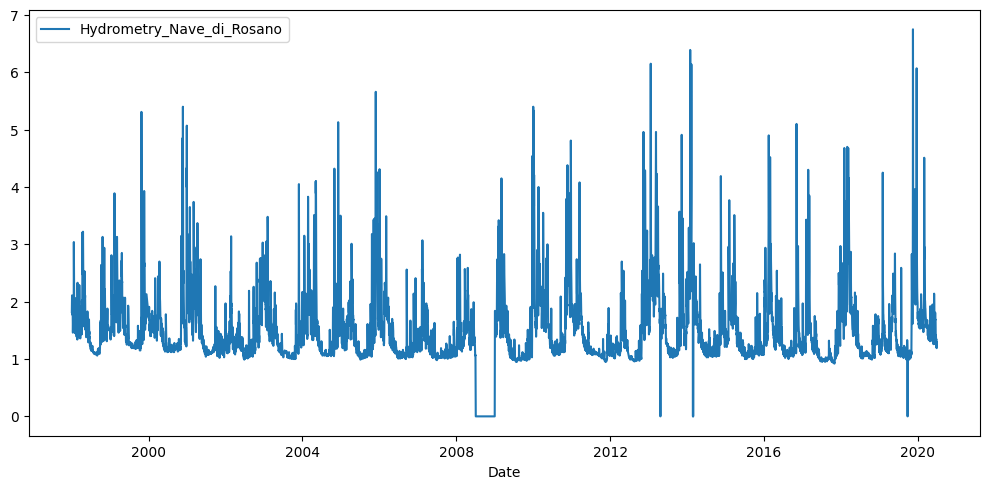

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10,5))
sns.lineplot(data=df_st)
plt.tight_layout()
plt.show()

In [23]:
df_st.dropna(inplace=True)

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

descomposion = seasonal_decompose(df_st,period=365)


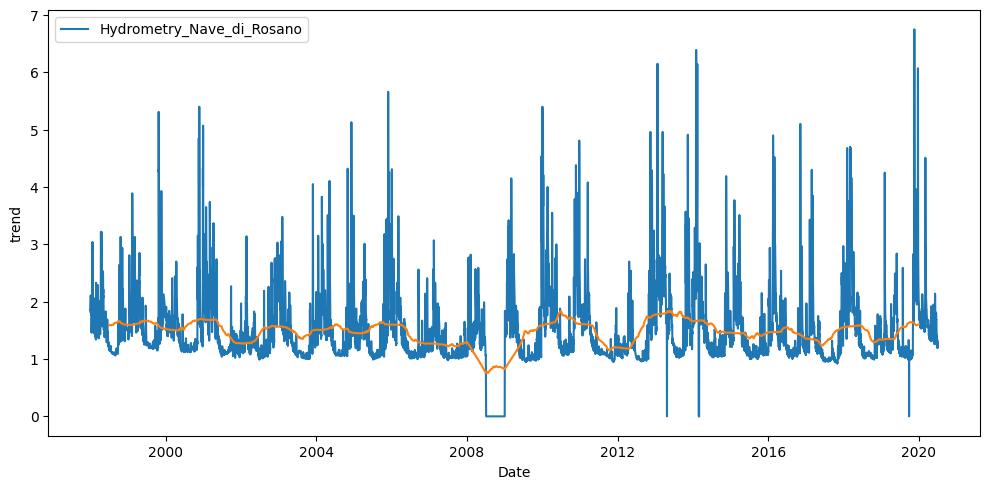

In [28]:
trend = descomposion.trend

plt.subplots(figsize=(10,5))
sns.lineplot(data=df_st)
sns.lineplot(data=trend)
plt.tight_layout()
plt.show()

In [31]:
estacionalidad = seasonal.trend

plt.subplots(figsize=(10,5))
sns.lineplot(data=df_st)
sns.lineplot(data=estacionalidad)
plt.tight_layout()
plt.show()

NameError: name 'seasonal' is not defined

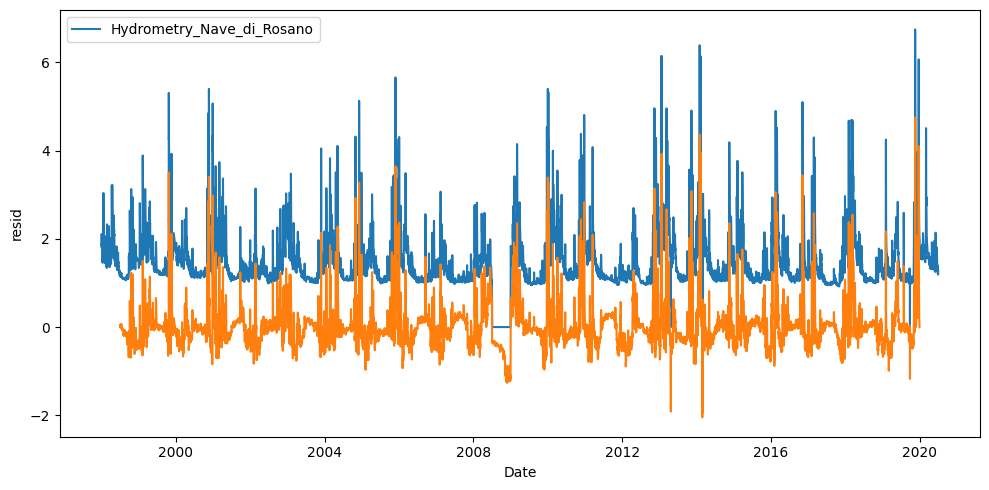

In [33]:
resid = descomposion.resid

plt.subplots(figsize=(10,5))
sns.lineplot(data=df_st)
sns.lineplot(data=resid)
plt.tight_layout()
plt.show()

In [34]:
df_train = df_st[df_st.index<pd.to_datetime('2020-06-01').date()]
df_test = df_st[df_st.index>=pd.to_datetime('2020-06-01').date()]

In [ ]:
from pmdarima import auto_arima

model = auto_arima(df_train,seasonal=True,trace=True,m=365)